In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
%matplotlib inline

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Execution Time: 23.64721103509267 min


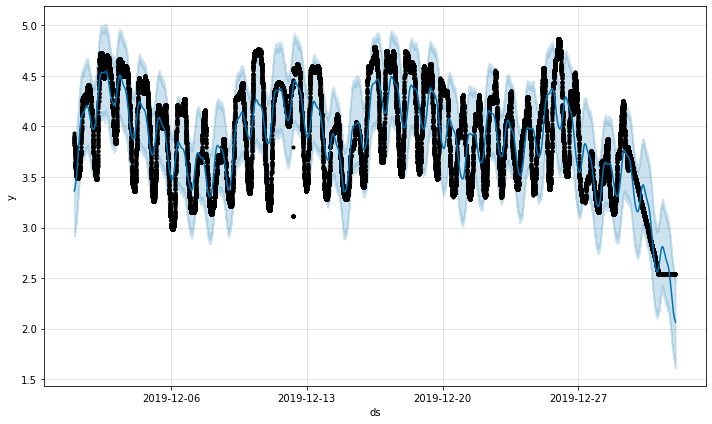

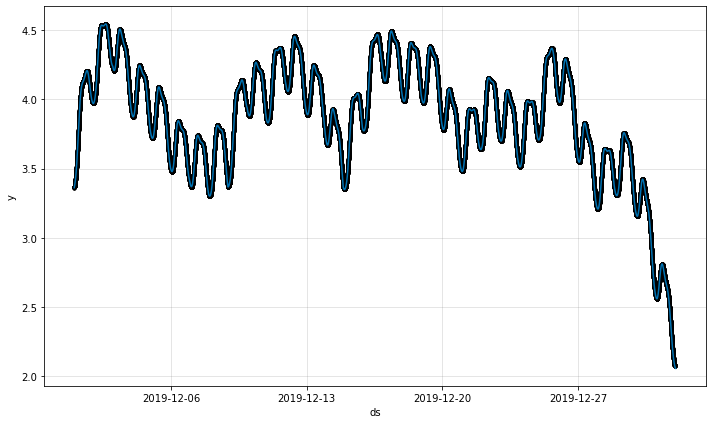

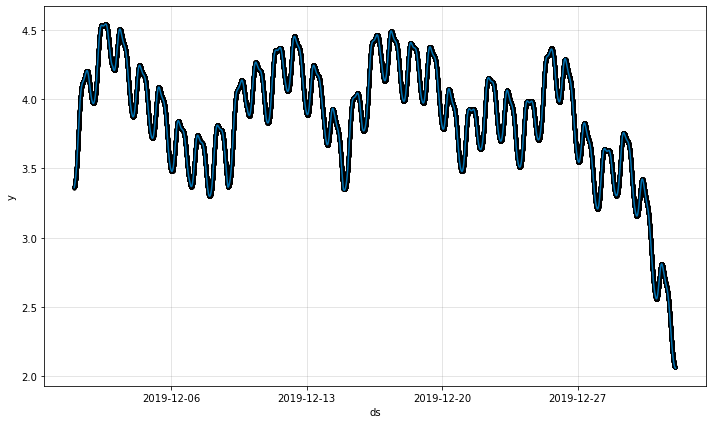

In [4]:
import time
start_time = time.time()
df = pd.read_csv('December-2019.csv')
df['ds']= pd.to_datetime(df['ds'])
df['y'] = df['KE']/52.660
df.drop('KE', axis=1, inplace=True)
m = Prophet(daily_seasonality=True)
prediction_size = 30
train_df = df[:-prediction_size]
m.fit(train_df)
future = m.make_future_dataframe(periods=60, freq='1min')
forecast = m.predict(future)
m.plot(forecast)
forecast.to_csv('new_data.csv')

for i in range(2):
    df1 = pd.read_csv('new_data.csv', usecols = ['ds', 'yhat'])
    df1['ds']= pd.to_datetime(df1['ds'])
    df1.rename(columns={'yhat': 'y'}, inplace=True)
    m = Prophet(daily_seasonality=True)
    prediction_size = 30
    train_df = df1[:-prediction_size]
    m.fit(train_df)
    future = m.make_future_dataframe(periods=60, freq='1min')
    forecast = m.predict(future)
    m.plot(forecast)
    forecast.to_csv('new_data.csv')

print("Execution Time: %s min" % ((time.time() - start_time)/60))  